Задача №1. Банковский счёт.

In [255]:
class BankAccount:
    def __init__(self, owner, balance=0):
        self.owner = owner
        self.balance = balance


    #Метод для внесения средств на счет.
    def deposit(self, amount):
        self.balance += amount


    #Метод для снятия средств со счета.
    def withdraw(self, amount):
        if self.balance < amount:
            print("Ошибка: Недостаточно средств")
        else:
            self.balance -= amount

    #Метод для получения текущего баланса счета.
    def get_balance(self):
        return self.balance

In [256]:
account = BankAccount("Иван", 1000)
account.deposit(500)
account.withdraw(200)
print(account.get_balance())  # Ожидаемый результат: 1300
account.withdraw(2000)  # Ожидаемый результат: "Ошибка: Недостаточно средств"

1300
Ошибка: Недостаточно средств


Задача №2: Чилловый библиотекарь

In [257]:
class Book:
    def __init__(self, title, author, year, status="доступна"):
        self.title = "'"+ title + "'"
        self.author = author
        self.year = year
        self.status = status

    #Возвращает строковое представление книги.
    #'Преступление и наказание' (1866), автор: Фёдор Достоевский, статус: доступна
    def __str__(self):
        return self.title + " (" + str(self.year) + "), автор: " + self.author + ", статус: " + self.status

    #Выдача книги в аренду.
    def borrow(self):
        if self.status == "доступна":
            self.status = "на полке"
            print("Книга " + self.title + " взята в аренду.")
        else:
            print("Книга уже взята в аренду.")

    #Возврат книги в библиотеку.
    def return_book(self):
        self.status = "доступна"
        print("Книга " + self.title + " возвращена в библиотеку.")

class Library:
    def __init__(self):
        self.books = list()

    #Добавить книгу в библиотеку.
    def add_book(self, book):
        self.books.append(book)
        print("Книга " + book.title + " добавлена в библиотеку.")

    #Удалить книгу из библиотеки.
    def remove_book(self, book):
        if book in self.books:
            self.books.remove(book)
            print("Книга " + book.title + " удалена из библиотеки.")

    #Найти книгу по названию.
    def find_book_by_title(self, title):
        for b in self.books:
            if b.title == title:
                print("Найденная книга: " + b)


        
    #Вывести список доступных книг.
    def list_available_books(self):
        print("Доступные книги в библиотеке:")
        for b in self.books:
            if b.status == "доступна":
                print(b)




In [258]:
# Создаем книгу и добавляем её в библиотеку
book1 = Book("1984", "Джордж Оруэлл", 1949)
book2 = Book("Преступление и наказание", "Фёдор Достоевский", 1866)
book3 = Book("Мастер и Маргарита", "Михаил Булгаков", 1967)

library = Library()
library.add_book(book1)
library.add_book(book2)
library.add_book(book3)

# Выводим доступные книги
library.list_available_books()

# Берем книгу в аренду
book1.borrow()

# Смотрим доступные книги снова
library.list_available_books()

# Возвращаем книгу в библиотеку
book1.return_book()

# Смотрим доступные книги после возврата
library.list_available_books()

#Найдём книгу по названию
library.find_book_by_title("1984")

Книга '1984' добавлена в библиотеку.
Книга 'Преступление и наказание' добавлена в библиотеку.
Книга 'Мастер и Маргарита' добавлена в библиотеку.
Доступные книги в библиотеке:
'1984' (1949), автор: Джордж Оруэлл, статус: доступна
'Преступление и наказание' (1866), автор: Фёдор Достоевский, статус: доступна
'Мастер и Маргарита' (1967), автор: Михаил Булгаков, статус: доступна
Книга '1984' взята в аренду.
Доступные книги в библиотеке:
'Преступление и наказание' (1866), автор: Фёдор Достоевский, статус: доступна
'Мастер и Маргарита' (1967), автор: Михаил Булгаков, статус: доступна
Книга '1984' возвращена в библиотеку.
Доступные книги в библиотеке:
'1984' (1949), автор: Джордж Оруэлл, статус: доступна
'Преступление и наказание' (1866), автор: Фёдор Достоевский, статус: доступна
'Мастер и Маргарита' (1967), автор: Михаил Булгаков, статус: доступна


Задача №3: Бу! Не бойся, я доктор

Теоретический вопрос: какие существуют алгоритмы для классификации, кроме логистической регрессии?
Метод K-ближайших соседей (KNN), метод опорных векторов (SVM), случайный лес, наивный байесовский метод.

In [259]:
#1 Загрузим данные
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

diabetes = load_diabetes()
#print(diabetes.DESCR)

n_samples, n_features = diabetes.data.shape

#3 Масштабируем признаки 
scaler = StandardScaler()
diabetes_data = scaler.fit_transform(diabetes.data)

#2 Разделим данные на обучающую и тестовую выборки
test_data = diabetes_data[:(n_samples // 3), :]
test_data_target = diabetes.target[:(n_samples // 3)]
learning_data = diabetes_data[(n_samples // 3): , :]
learning_data_target = diabetes.target[(n_samples // 3):]


def ML(learning_data, learning_data_target, test_data, test_data_target):
    #граница для выделения диабетиков
    bound = learning_data_target.mean()

    #4 Построим классификатор с использованием логистической регрессии
    model = LogisticRegression()
    y = (learning_data_target > bound)
    y = np.array(y, dtype=int)
    model.fit(learning_data, y)

    result = model.predict(test_data)
    print("Predicted:", result)
    y = (test_data_target > bound)
    print("Real", np.array(y, dtype=int))

    #Оценка точности
    acc = accuracy_score(y, result)
    print("Logistic Regression model accuracy (in %):", acc*100)



ML(learning_data, learning_data_target, test_data, test_data_target)


Predicted: [1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1]
Real [0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1]
Logistic Regression model accuracy (in %): 74.82993197278913


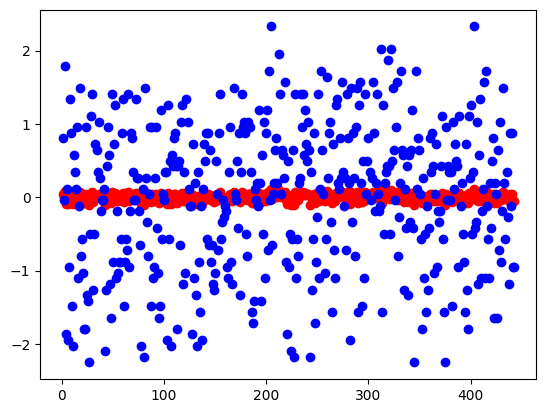

In [260]:
#здесь я просто смотрела, как данные масштабируются

import matplotlib.pyplot as plt
from matplotlib import ticker

x_index = 0


plt.scatter(np.arange(1, n_samples + 1), diabetes.data[:, x_index], color="red")
plt.scatter(np.arange(1, n_samples + 1), StandardScaler().fit_transform(diabetes.data)[:, x_index], color="blue")
plt.show()

Задача №4: Плохой риелтор

Attribute Information:
- MedInc - median income in block group
- HouseAge - median house age in block group
- AveRooms - average number of rooms per household
- AveBedrms - average number of bedrooms per household
- Population - block group population
- AveOccup - average number of household members
- Latitude - block group latitude
- Longitude - block group longitude


In [261]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = fetch_california_housing(as_frame=True).frame
#print(fetch_california_housing().DESCR)

# Преобразуем некоторые числовые признаки в категориальные
categorical_features = ["AveRooms", "AveOccup", "HouseAge"]  
binner = KBinsDiscretizer(n_bins=4, encode="onehot-dense", strategy="quantile")
X_categorical = binner.fit_transform(X[categorical_features])
X_categorical_df = pd.DataFrame(X_categorical, columns=[f"{col}_bin_{i}" for col in categorical_features for i in range(4)])


#1 Объедините категориальные признаки с оставшимися числовыми, чтобы использовать их вместе.
X2 = X.drop(columns=["AveRooms","AveBedrms","AveOccup", "MedHouseVal"])
data = X_categorical_df.merge(X2, left_index=True, right_index=True)
data_target = X["MedHouseVal"]

def ML(data, data_target):
    #разделение данных
    global learning_data, test_data, test_data_target, learning_data_target

    n_samples, n_features = data.shape
    test_data = data.loc[:(n_samples // 3), :]
    test_data_target = data_target.loc[:(n_samples // 3)]
    learning_data = data.loc[(n_samples // 3): , :]
    learning_data_target = data_target.loc[(n_samples // 3):]

    #построение модели
    model = LinearRegression()
    model.fit(learning_data, learning_data_target)
    result = model.predict(test_data)
    # print("Predicted:", result)
    # print("Real:", test_data_target)

    #2 Рассчитайте MSE и R^2, чтобы оценить качество модели.
    mse = mean_squared_error(test_data_target, result)
    r2 = r2_score(test_data_target, result)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")

ML(data, data_target)


Mean Squared Error: 0.51
R-squared Score: 0.62


In [262]:
#3 Оцените, какие из признаков вносят наибольший вклад при предсказании стоимости дома.
val = f_regression(learning_data, learning_data_target)[0]
col = data.columns
for i in range(len(col)):
    print(col[i] + ":", val[i])


AveRooms_bin_0: 217.44482952396584
AveRooms_bin_1: 277.5877823450638
AveRooms_bin_2: 55.35232369608122
AveRooms_bin_3: 1528.3550275352914
AveOccup_bin_0: 449.4439939137813
AveOccup_bin_1: 51.19911897318171
AveOccup_bin_2: 9.911024197316356
AveOccup_bin_3: 661.2843915155141
HouseAge_bin_0: 59.70068307746926
HouseAge_bin_1: 2.4550891640426693
HouseAge_bin_2: 0.45901946484724887
HouseAge_bin_3: 116.02571849517915
MedInc: 12057.586014392506
HouseAge: 197.58329183917422
Population: 51.144901697858444
Latitude: 72.8448655160492
Longitude: 262.811760955538


Мы видим, что наибольший вклад вносит MedInc, то есть средний доход жильцов, после него AveRooms - среднее количество спален в доме, причем влияет именно случай, когда это число большое.

In [263]:
#4 Посмотрите как добавление или удаление категориальных признаков (например, HouseAge_bin, AveRooms_bin) влияет на качество модели.
# Построим предсказание только на числовых признаках
data2 = X2.copy()
data_target2 = data_target.copy()
ML(data2, data_target2)


Mean Squared Error: 0.61
R-squared Score: 0.55


In [264]:
# Добавим HouseAge_bin
data3 = X2.copy()
data_target3 = data_target.copy()
data3 = X2.merge(X_categorical_df["HouseAge_bin_0"], left_index=True, right_index=True)
data3 = X2.merge(X_categorical_df["HouseAge_bin_1"], left_index=True, right_index=True)
data3 = X2.merge(X_categorical_df["HouseAge_bin_2"], left_index=True, right_index=True)
data3 = X2.merge(X_categorical_df["HouseAge_bin_3"], left_index=True, right_index=True)
ML(data3, data_target3)


Mean Squared Error: 0.61
R-squared Score: 0.54


In [265]:
# Добавим AveRooms_bin
data4 = X2.copy()
data_target4 = data_target.copy()
data4 = X2.merge(X_categorical_df["AveRooms_bin_0"], left_index=True, right_index=True)
data4 = X2.merge(X_categorical_df["AveRooms_bin_1"], left_index=True, right_index=True)
data4 = X2.merge(X_categorical_df["AveRooms_bin_2"], left_index=True, right_index=True)
data4 = X2.merge(X_categorical_df["AveRooms_bin_3"], left_index=True, right_index=True)
ML(data4, data_target4)

Mean Squared Error: 0.61
R-squared Score: 0.54


In [266]:
# Добавим AveOccup_bin
data5 = X2.copy()
data_target5 = data_target.copy()
data5 = X2.merge(X_categorical_df["AveOccup_bin_0"], left_index=True, right_index=True)
data5 = X2.merge(X_categorical_df["AveOccup_bin_1"], left_index=True, right_index=True)
data5 = X2.merge(X_categorical_df["AveOccup_bin_2"], left_index=True, right_index=True)
data5 = X2.merge(X_categorical_df["AveOccup_bin_3"], left_index=True, right_index=True)
ML(data5, data_target5)

Mean Squared Error: 0.58
R-squared Score: 0.57


Видно, что среди всех категориальных признаков значительнее остальных AveOccup_bin повышает точность, но в целом категориальные признаки мало влияют на результат модели. 

In [267]:
#5 Исследуйте, как разные методы предобработки данных влияют на результат модели. 
#Стандартизируем численные признаки

binner6 = KBinsDiscretizer(n_bins=4, encode="onehot-dense", strategy="quantile")
X_categorical6 = binner6.fit_transform(X[categorical_features])
X_categorical_df6 = pd.DataFrame(X_categorical, columns=[f"{col}_bin_{i}" for col in categorical_features for i in range(4)])


X6 = X.drop(columns=["AveRooms","AveBedrms","AveOccup", "MedHouseVal"])
X6 = pd.DataFrame(StandardScaler().fit_transform(X6.values), index=X6.index, columns=X6.columns)
data6 = X_categorical_df.merge(X6, left_index=True, right_index=True)
data_target6 = X["MedHouseVal"]
ML(data6, data_target6)


Mean Squared Error: 0.51
R-squared Score: 0.62


Стандартизация никак не повлияла на точность модели.